# Sarcasm Detection


## Install `Tensorflow2.0`

In [1]:
!pip install tensorflow

## Get Required Files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Set your project path
project_path =  '/content/drive/MyDrive'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and analyse some insights about the data.
As Dataset is in json format you need to use pandas.read_json function.

In [3]:
import pandas as pd
import os

data = pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)

In [4]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [5]:
print (data.shape)
data.describe()

(26709, 3)


,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [7]:
import numpy as np
data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [8]:
data['headline'][2]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [9]:
data['is_sarcastic'][2]

1

In [10]:
##The column headline needs to be cleaned up as we have special characters and numbers in the column

import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:

def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text


In [15]:

data['headline']=data['headline'].apply(cleanData)

In [16]:
data['headline'][2]

'mom starting to fear sons web series closest thing she will have to grandchild'

## Drop unneccesary columns from dataset.
As we only need headline text data and is_sarcastic column for this project. We can drop other columns here.

In [17]:
data.drop('article_link',inplace=True,axis=1)

## Get the Length of each line and find the maximum length.
As different lines are of different length. We need to pad our sequences using the max length.

In [18]:
maxlen = max([len(text) for text in data['headline']])

In [19]:
maxlen

240

#**## Modelling**

## Import required modules required for modelling.

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model.

In [21]:
max_features = 25000
maxlen = max([len(text) for text in data['headline']])
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.
First create a tokenizer instance using Tokenizer(num_words=max_features)
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [22]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(data['headline'])



# Define X and y for your model.

In [23]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0  

In [51]:
tokenizer

In [52]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Get the Vocabulary size
You can use tokenizer.word_index.

In [24]:
num_words=len(tokenizer.word_index)
print (num_words)

27667


#**## Word Embedding**

## Get Glove Word Embeddings

In [25]:
# Get the vocabulary size
num_words = min(max_features, len(tokenizer.word_index) + 1)
print(f"Vocabulary size: {num_words}")

Vocabulary size: 25000


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [28]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [29]:
!kaggle datasets download -d mrugankakarte/glove-6b-200d-pretrained-word-vectors

Dataset URL: https://www.kaggle.com/datasets/mrugankakarte/glove-6b-200d-pretrained-word-vectors
License(s): GPL-2.0
100% 258M/259M [00:02<00:00, 105MB/s]
100% 259M/259M [00:02<00:00, 99.8MB/s]


In [35]:
# Load GloVe word embeddings
#glove_file = '/content/gdrive/MyDrive/Kaggle/'+"glove.6B.zip"
#from zipfile import ZipFile
#with ZipFile(glove_file, 'r') as z:
#    z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [36]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
with open(EMBEDDING_FILE, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embd = np.asarray(values[1:], dtype='float32')
        embeddings[word] = embd

print(f"Total GloVe word vectors: {len(embeddings)}")

Total GloVe word vectors: 400000


400000

# Create a weight matrix for words in training docs

In [37]:
# Create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i < num_words:  # Ensure index is within bounds
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Embedding matrix shape: (25000, 200)


## Create and Compile your Model
Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required.
In the end add a final dense layer with sigmoid activation for binary classification.


In [38]:
### Embedding layer for hint
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint
## model.add(Bidirectional(LSTM(128, return_sequences = True)))
import tensorflow as tf

input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=200,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(2,activation='softmax')(dense)

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [39]:
batch_size = 100
epochs = 5

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240)]             0         
                                                                 
 embedding (Embedding)       (None, 240, 200)          5000000   
                                                                 
 bidirectional (Bidirection  (None, 256)               336896    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                             

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
214/214 [==============================] - 353s 2s/step - loss: 0.4514 - accuracy: 0.7787
Epoch 2/5
214/214 [==============================] - 342s 2s/step - loss: 0.2430 - accuracy: 0.9005
Epoch 3/5
214/214 [==============================] - 343s 2s/step - loss: 0.1340 - accuracy: 0.9515
Epoch 4/5
214/214 [==============================] - 381s 2s/step - loss: 0.0650 - accuracy: 0.9781
Epoch 5/5
214/214 [==============================] - 345s 2s/step - loss: 0.0308 - accuracy: 0.9899


In [42]:
model.save('sarcasm_model.h5')


In [48]:
%cd /content/gdrive/MyDrive/Kaggle


/content/gdrive/MyDrive/Kaggle


167/167 [==============================] - 60s 356ms/step


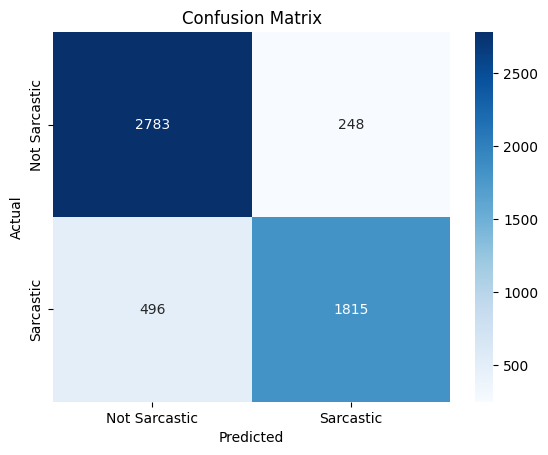

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3031
           1       0.88      0.79      0.83      2311

    accuracy                           0.86      5342
   macro avg       0.86      0.85      0.86      5342
weighted avg       0.86      0.86      0.86      5342



In [50]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('sarcasm_model.h5')

# Make predictions on the test set
test_pred = model.predict(np.array(X_test), verbose=1)
test_pred = [1 if j > i else 0 for i, j in test_pred]

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, test_pred))
